In [1]:
# Import required libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import researchpy as rp
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import missingno as msno
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df = df.dropna(subset=['RainTomorrow'])
labels = ['No', 'Yes']
print(df.head(10))

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1     

In [4]:
print(f'The number of rows are {df.shape[0] } and the number of columns are {df.shape[1]}')

The number of rows are 142193 and the number of columns are 23


In [5]:
print(df.info())

print(df.nunique())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

In [7]:
#def imputer(X_train, X_test):
    # # Separate the numerical and categorical features
    # numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    # categorical_features = X_train.select_dtypes(include=object).columns.tolist()
    # # Perform preprocessing for numerical features
    # imputer_num = SimpleImputer(strategy='mean')
    # imputer_cat = SimpleImputer(strategy='most_frequent')
    # X_train[numerical_features] = imputer_num.fit_transform(X_train[numerical_features])
    # X_test[numerical_features] = imputer_num.transform(X_test[numerical_features])
    # X_train[categorical_features] = imputer_cat.fit_transform(X_train[categorical_features])
    # X_test[categorical_features] = imputer_cat.transform(X_test[categorical_features])
    # return X_train, X_test

def imputer(X):
    # Separate the numerical and categorical features
    numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(include=object).columns.tolist()
    # Perform preprocessing for numerical features
    imputer_num = SimpleImputer(strategy='mean')
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X[numerical_features] = imputer_num.fit_transform(X[numerical_features])
    X[categorical_features] = imputer_cat.fit_transform(X[categorical_features])
    return X


def impute_scale(X_train, X_test):
    # Separate the numerical and categorical features
    numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X_train.select_dtypes(include=object).columns.tolist()
    #X_train, X_test = imputer(X_train, X_test)
    scaler = StandardScaler()
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])
    return X_train, X_test


def impute_one_hot_encode(X_train, X_test):
    numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X_train.select_dtypes(include=object).columns.tolist()
    # Impute missing values in categorical features
    #X_train, X_test = imputer(X_train, X_test)
    # One-hot encoding
    onehot = OneHotEncoder(handle_unknown='ignore')
    X_train_onehot = onehot.fit_transform(X_train[categorical_features]).toarray()
    X_test_onehot = onehot.transform(X_test[categorical_features]).toarray()
    # Get the names of the encoded columns
    encoded_feature_names = onehot.get_feature_names_out(categorical_features)
    # Put transformed data back into DataFrames
    X_train_onehot = pd.DataFrame(X_train_onehot, columns=encoded_feature_names)
    X_test_onehot = pd.DataFrame(X_test_onehot, columns=encoded_feature_names)
    X_train.reset_index(inplace=True)
    X_test.reset_index(inplace=True)
    # Concatenate the encoded features with the continuous features
    X_train = pd.concat([X_train[numerical_features], X_train_onehot], axis=1)
    X_test = pd.concat([X_test[numerical_features], X_test_onehot], axis=1)
    return X_train, X_test


def plot_confusion_matrix(cm, labels, method_name):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=f'Confusion Matrix-{method_name}',
           ylabel='True label',
           xlabel='Predicted label')

    # Add text annotations to each cell
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.show()


def yes_no_to_binary(response):
    if response.lower() == "yes":
        return 1
    elif response.lower() == "no":
        return 0
    else:
        return None


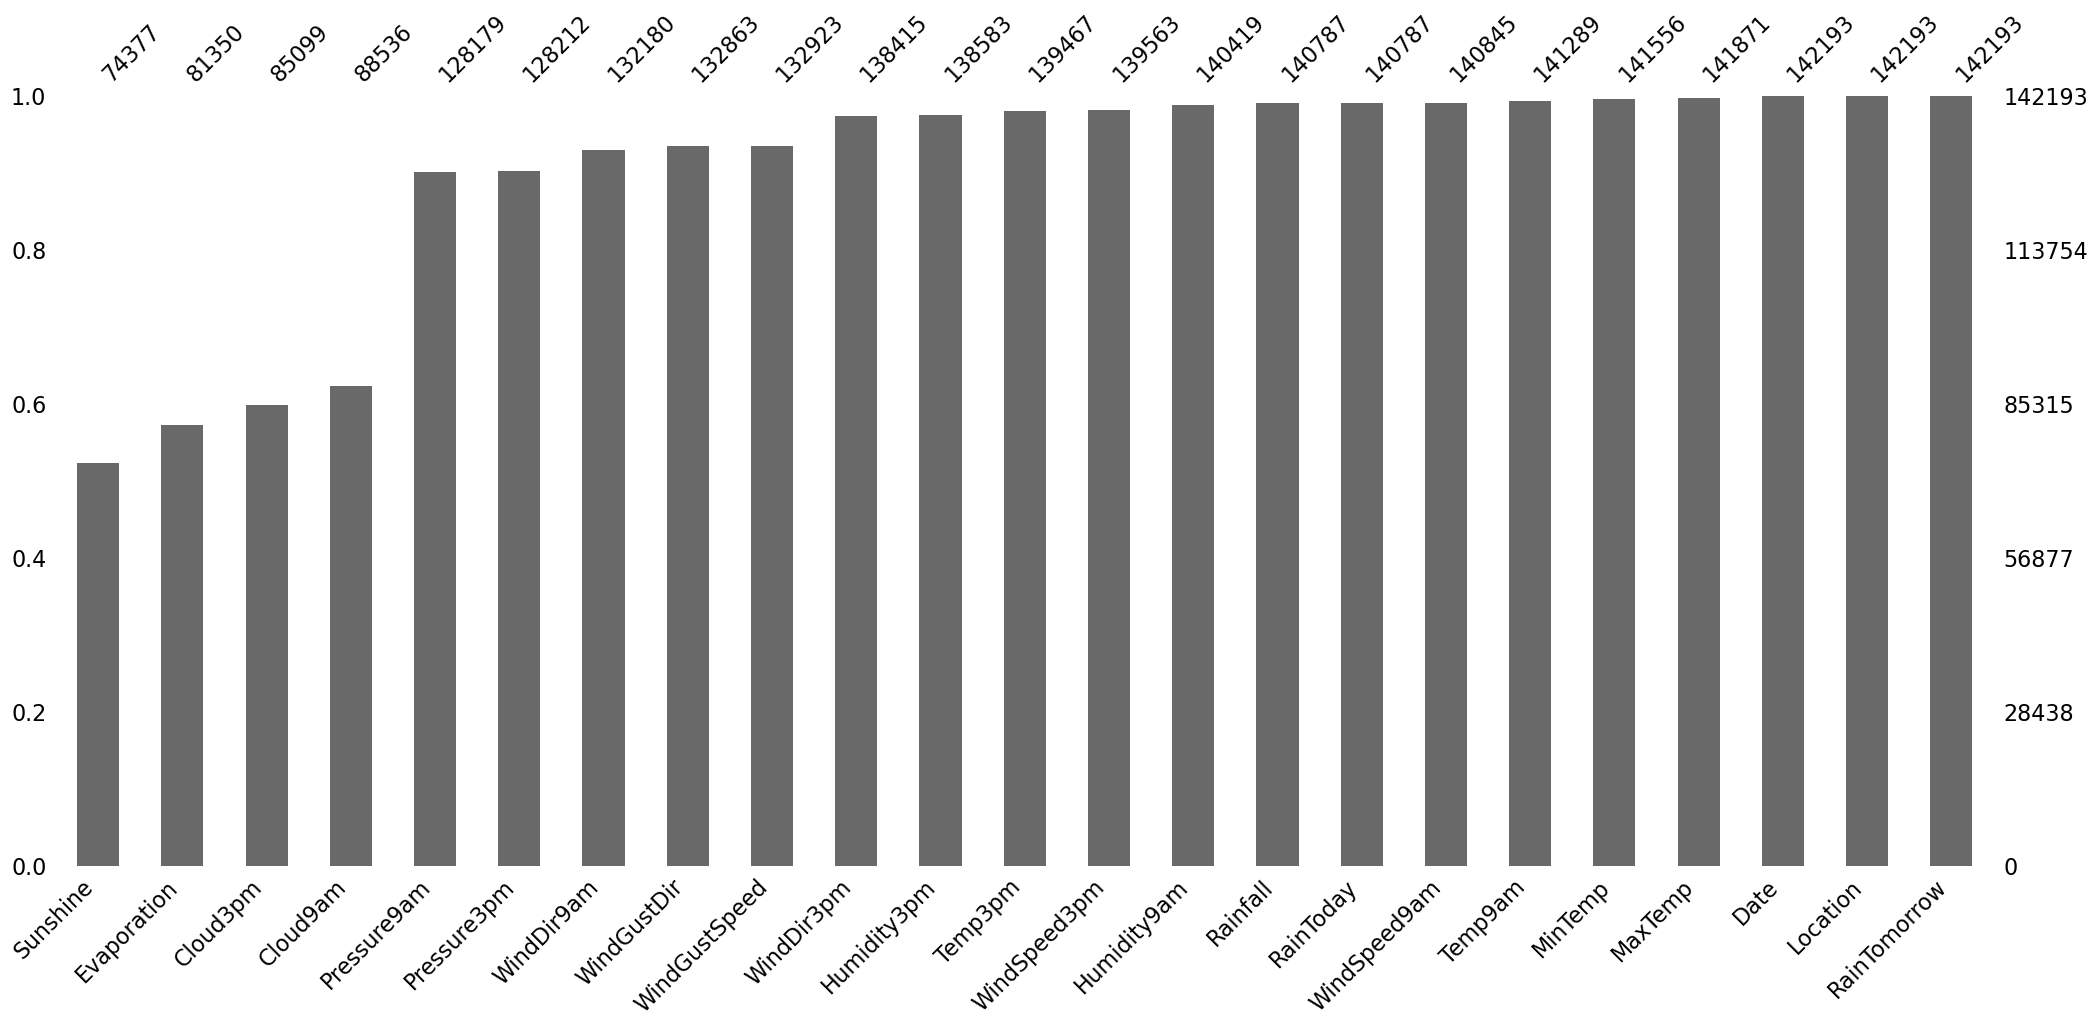

In [8]:
msno.bar(df, sort='ascending')
plt.show()

df['RainTomorrow'] = df['RainTomorrow'].apply(yes_no_to_binary)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [9]:
print(df.shape)

(142193, 25)


In [10]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [12]:
# Perform preprocessing for numerical features
X = imputer(X)

# 6 columns are of type 'object' and remaining of 'float'
cat, cont = [], []

In [13]:
X_viz_list = X.drop(['Year', 'Month', 'Day'], axis=1)

for i in X_viz_list.columns:
    if X[i].dtypes == 'object':
        cat.append(i)
    else:
        cont.append(i)

print(cat)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [14]:
print("Categorical Variables are", cat)
print("Numerical Variables are", cont)

Categorical Variables are ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables are ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


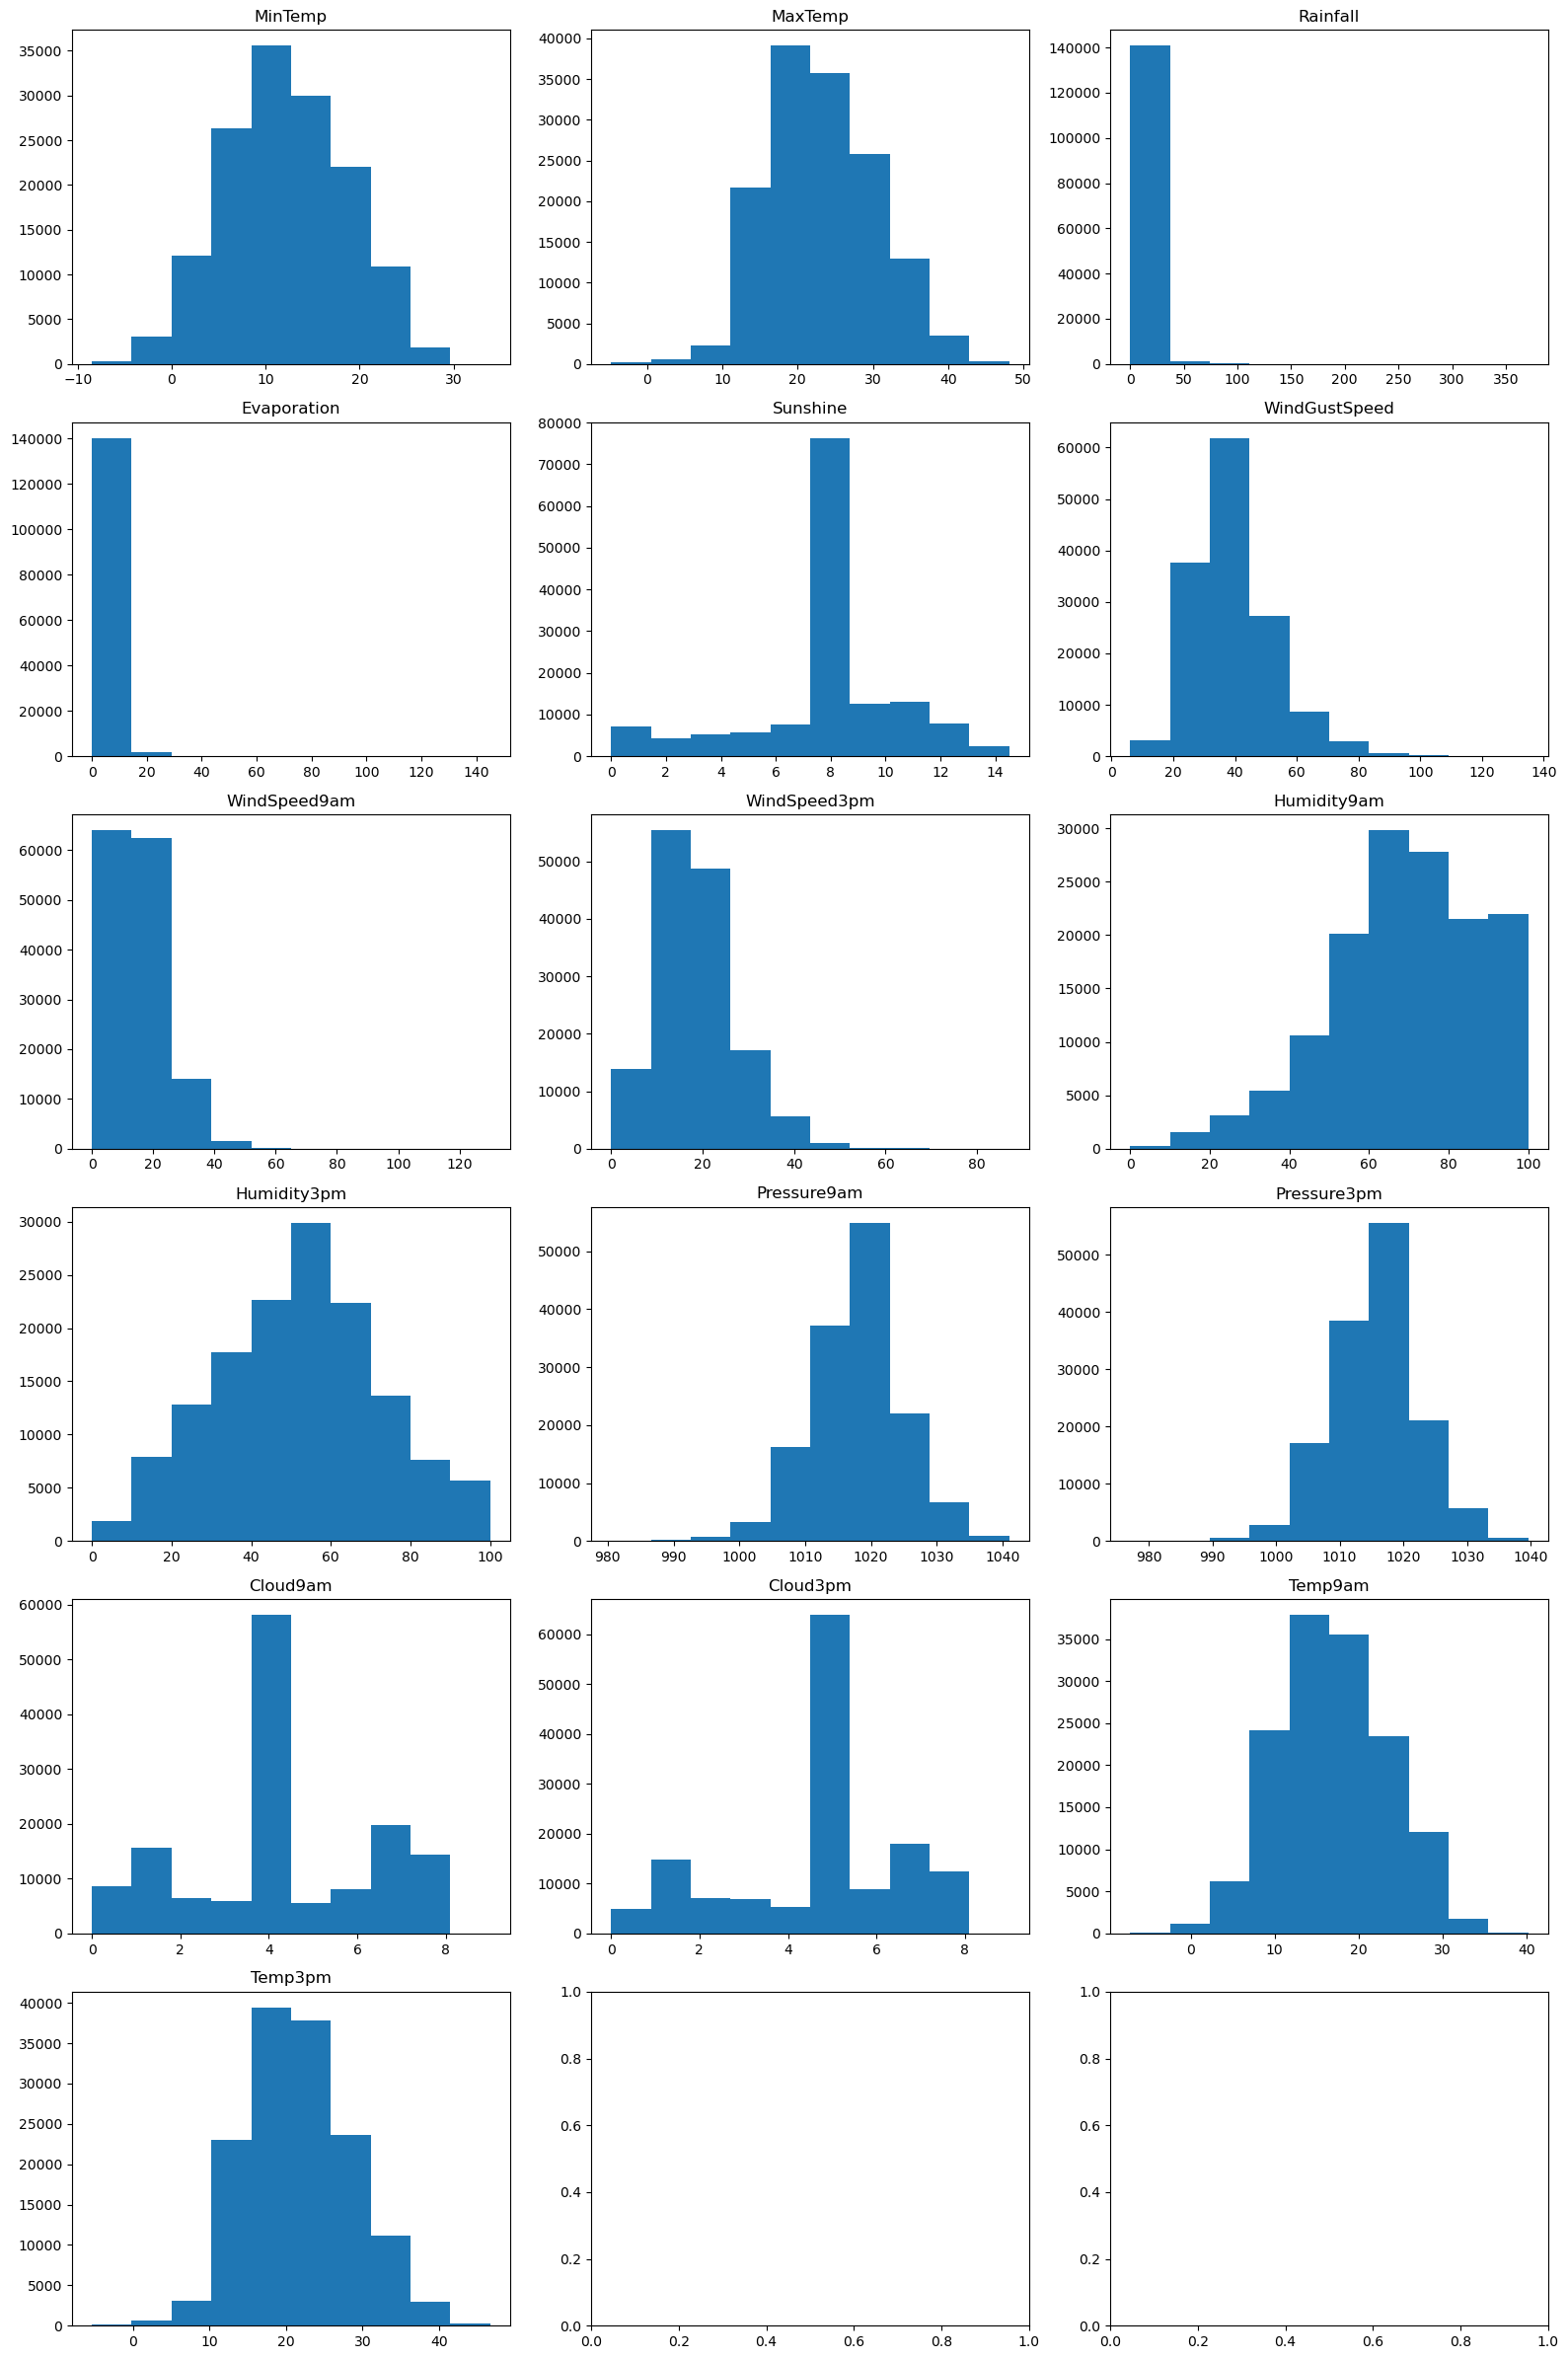

In [15]:
num_cols = len(cont)
num_rows = (num_cols + 2) // 3  # Round up to nearest multiple of 3
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 4*num_rows))

for i, column in enumerate(X[cont]):
    row_idx = i // 3
    col_idx = i % 3
    axes[row_idx, col_idx].hist(X[column])
    axes[row_idx, col_idx].set_title(column)

plt.tight_layout()
plt.show()


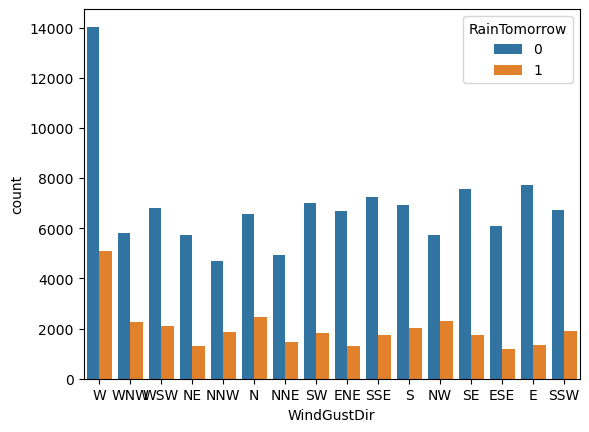


                  Chi-square test    results
0  Pearson Chi-square ( 15.0) =   1882.7416
1                     p-value =      0.0000
2                  Cramer's V =      0.1151


In [16]:
sns.countplot(x=X["WindGustDir"], hue=y)
plt.show()
crosstab, test_results, expected = rp.crosstab(X["WindDir9am"], y,
                                               test="chi-square",
                                               expected_freqs= True,
                                               prop="cell")

print("\n", test_results)

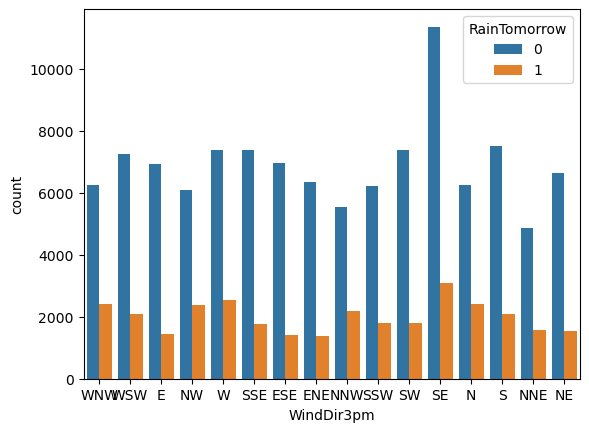


                  Chi-square test    results
0  Pearson Chi-square ( 15.0) =   1216.6671
1                     p-value =      0.0000
2                  Cramer's V =      0.0925


In [17]:
sns.countplot(x=X["WindDir3pm"], hue=y)
plt.show()
crosstab, test_results, expected = rp.crosstab(X["WindDir3pm"], y,
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print("\n", test_results)

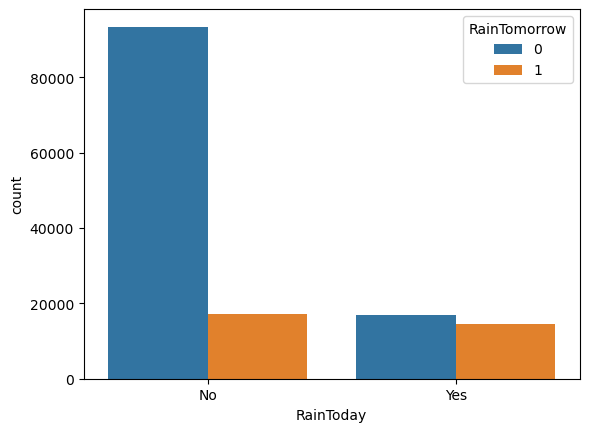


                 Chi-square test     results
0  Pearson Chi-square ( 1.0) =   13362.7100
1                    p-value =       0.0000
2               Cramer's phi =       0.3066


In [18]:
sns.countplot(x=X["RainToday"], hue=y)
plt.show()

crosstab, test_results, expected = rp.crosstab(X["RainToday"], y,
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print("\n", test_results)

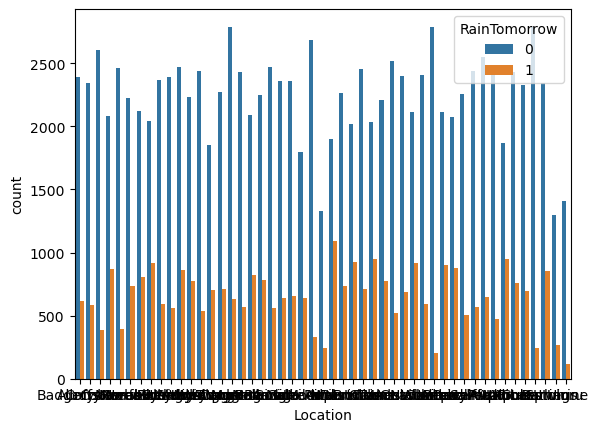


                  Chi-square test    results
0  Pearson Chi-square ( 48.0) =   3544.7902
1                     p-value =      0.0000
2                  Cramer's V =      0.1579


In [19]:
sns.countplot(x=X["Location"], hue=y)
plt.show()

crosstab, test_results, expected = rp.crosstab(X["Location"], y,
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print("\n", test_results)

In [20]:
feature_selector = SelectKBest(score_func=f_regression, k="all")
fit = feature_selector.fit(X[cont], y)

In [21]:
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X[cont].columns)
print(input_variable_names)

                0
0         MinTemp
1         MaxTemp
2        Rainfall
3     Evaporation
4        Sunshine
5   WindGustSpeed
6    WindSpeed9am
7    WindSpeed3pm
8     Humidity9am
9     Humidity3pm
10    Pressure9am
11    Pressure3pm
12       Cloud9am
13       Cloud3pm
14        Temp9am
15        Temp3pm


In [22]:
# Assuming df is your original dataframe
# Columns to include in X
columns_to_include = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm'
]

# Create a new dataframe X with the selected columns
X = df[columns_to_include].copy()

# Optionally, if you want to reset the index of X
# X.reset_index(drop=True, inplace=True)


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81350 non-null   float64
 4   Sunshine       74377 non-null   float64
 5   WindGustSpeed  132923 non-null  float64
 6   WindSpeed9am   140845 non-null  float64
 7   WindSpeed3pm   139563 non-null  float64
 8   Humidity9am    140419 non-null  float64
 9   Humidity3pm    138583 non-null  float64
 10  Pressure9am    128179 non-null  float64
 11  Pressure3pm    128212 non-null  float64
 12  Cloud9am       88536 non-null   float64
 13  Cloud3pm       85099 non-null   float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
dtypes: float64(16)
memory usage: 18.4 MB


In [24]:
summary_stats = pd.concat([input_variable_names, p_values, scores], axis=1)
summary_stats.columns = ["input_variable", "p_value", "F-Score"]
summary_stats.sort_values(by="p_value", inplace=True)

In [25]:
p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["F-Score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
print(selected_variables)

['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'WindSpeed9am', 'Evaporation', 'WindSpeed3pm', 'MinTemp', 'Temp9am']


In [42]:
# # MODELLING CODE STARTS HERE


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 18401 to 124925
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        113229 non-null  float64
 1   MaxTemp        113486 non-null  float64
 2   Rainfall       112572 non-null  float64
 3   Evaporation    64963 non-null   float64
 4   Sunshine       59409 non-null   float64
 5   WindGustSpeed  106348 non-null  float64
 6   WindSpeed9am   112671 non-null  float64
 7   WindSpeed3pm   111645 non-null  float64
 8   Humidity9am    112334 non-null  float64
 9   Humidity3pm    110841 non-null  float64
 10  Pressure9am    102497 non-null  float64
 11  Pressure3pm    102529 non-null  float64
 12  Cloud9am       70713 non-null   float64
 13  Cloud3pm       67987 non-null   float64
 14  Temp9am        113018 non-null  float64
 15  Temp3pm        111548 non-null  float64
dtypes: float64(16)
memory usage: 14.8 MB
None


In [43]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
57760,7.1,13.0,8.8,NaN,NaN,41.0,24.0,22.0,100.0,98.0,1001.7,1005.4,8.0,8.0,8.6,11.5
127128,13.2,18.3,0.0,NaN,NaN,48.0,24.0,20.0,73.0,73.0,1027.6,1023.8,NaN,NaN,14.2,17.0
119994,9.2,22.7,0.0,5.0,11.1,52.0,26.0,20.0,45.0,25.0,1030.1,1025.9,0.0,0.0,15.1,22.5
7088,15.3,26.1,0.0,10.4,NaN,44.0,24.0,19.0,48.0,40.0,1013.2,1009.8,7.0,7.0,17.5,24.3
62992,11.9,31.8,0.0,5.0,4.1,72.0,6.0,19.0,89.0,25.0,1006.7,1001.0,7.0,6.0,16.2,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59458,2.7,9.7,0.0,NaN,NaN,26.0,7.0,0.0,76.0,95.0,1017.9,1015.6,8.0,8.0,6.8,8.1
73138,5.0,22.9,3.4,5.5,10.8,41.0,13.0,26.0,76.0,32.0,1019.9,1018.4,1.0,2.0,10.9,21.0
35876,11.2,26.1,0.0,7.4,10.4,31.0,13.0,24.0,60.0,38.0,1028.3,1024.6,1.0,5.0,18.1,22.1
59558,8.3,20.8,0.0,NaN,NaN,46.0,24.0,24.0,56.0,36.0,1015.1,1013.8,2.0,NaN,13.8,20.1


In [27]:
X_train, X_test = impute_scale(X_train, X_test)
X_train, X_test = impute_one_hot_encode(X_train, X_test)

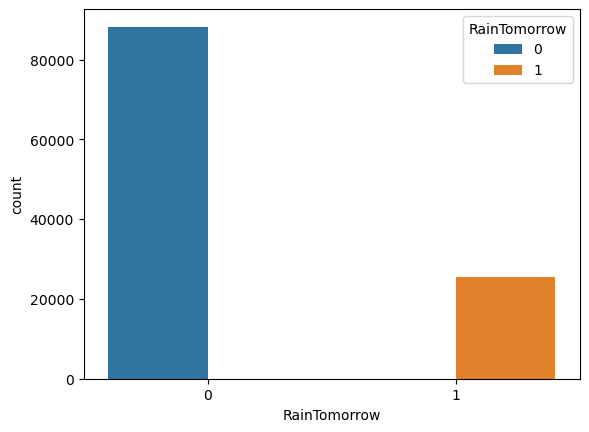

In [28]:
# models(X_train, X_test, y_train, y_test, labels)
sns.countplot(x = y_train, hue = df['RainTomorrow'])
plt.show()

In [29]:
sm = SMOTE()
#(sampling_strategy='minority', random_state=42)

In [34]:
print(X_train.isnull().sum())  # This will show the count of NaN values in each column
print(np.isinf(X_train).sum())  # This will show the count of infinite values in each column


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


In [32]:
def impute_scale(X_train, X_test):
    # Separate the numerical and categorical features
    numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X_train.select_dtypes(include=object).columns.tolist()

    # Perform preprocessing for numerical features
    imputer_num = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train[numerical_features] = imputer_num.fit_transform(X_train[numerical_features])
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = imputer_num.transform(X_test[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])
    return X_train, X_test

In [44]:
X_train, X_test = impute_scale(X_train, X_test)


In [45]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
57760,-0.795121,-1.437856,0.766088,0.000000,-6.505460e-16,0.079434,1.131626,0.387379,1.645684,2.266466,-2.363065,-1.474898,1.567065e+00,1.662679e+00,-1.295593,-1.481647
127128,0.160396,-0.692402,-0.278741,0.000000,-6.505460e-16,0.612747,1.131626,0.157731,0.220403,1.048809,1.473802,1.277997,7.804355e-16,-4.219878e-16,-0.430131,-0.681306
119994,-0.466173,-0.073535,-0.278741,-0.147259,1.273515e+00,0.917497,1.357820,0.157731,-1.257666,-1.289093,1.844156,1.592186,-1.947704e+00,-2.138249e+00,-0.291038,0.119035
7088,0.489344,0.404681,-0.278741,1.542068,-6.505460e-16,0.307996,1.131626,0.042907,-1.099301,-0.558498,-0.659437,-0.816597,1.127719e+00,1.187563e+00,0.079874,0.380964
62992,-0.043239,1.206395,-0.278741,-0.147259,-1.290058e+00,2.441248,-0.904114,0.042907,1.065014,-1.289093,-1.622357,-2.133199,1.127719e+00,7.124469e-01,-0.121037,0.832066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59458,-1.484346,-1.902006,-0.278741,0.000000,-6.505460e-16,-1.063380,-0.791017,-2.138751,0.378768,2.120348,0.036829,0.051163,1.567065e+00,1.662679e+00,-1.573778,-1.976404
73138,-1.124070,-0.045405,0.124943,0.009160,1.163648e+00,0.079434,-0.112437,0.846676,0.378768,-0.948149,0.333112,0.470082,-1.508358e+00,-1.188017e+00,-0.940135,-0.099240
35876,-0.152889,0.404681,-0.278741,0.603553,1.017158e+00,-0.682442,-0.112437,0.617028,-0.465843,-0.655911,1.577502,1.397688,-1.508358e+00,2.373309e-01,0.172602,0.060828
59558,-0.607151,-0.340773,-0.278741,0.000000,-6.505460e-16,0.460371,1.131626,0.617028,-0.676996,-0.753324,-0.377968,-0.218142,-1.069012e+00,-4.219878e-16,-0.491949,-0.230205


In [35]:
# Fit and resample the data
X_train, y_train = sm.fit_resample(X_train, y_train)
print(y_train)

0         0
1         1
2         0
3         0
4         0
         ..
176431    1
176432    1
176433    1
176434    1
176435    1
Name: RainTomorrow, Length: 176436, dtype: int64


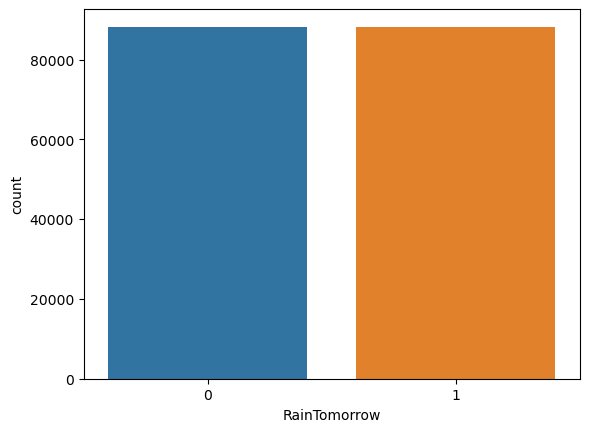

In [36]:
sns.countplot(x = y_train)
plt.show()
#models(X_train, X_test, y_train, y_test, labels)

Building Models...
Building Logistic Regression model...


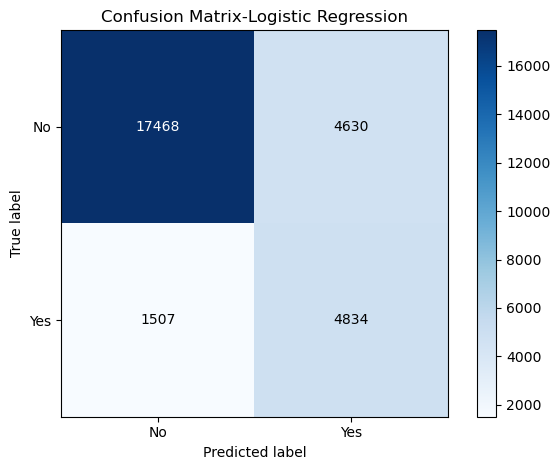

                 Model  Accuracy   ROC AUC  Precision    Recall  F1-score
0  Logistic Regression  0.784205  0.858096   0.829207  0.784205  0.797321
Building KNN model...


KeyboardInterrupt: 

In [37]:
print('Building Models...')

# 1. Logistic Regression
method_name_lr = 'Logistic Regression'
print(f'Building {method_name_lr} model...')
results_lr = []
LR_classifier = LogisticRegression(random_state=0)
LR_classifier.fit(X_train, y_train)
y_pred_lr = LR_classifier.predict(X_test)
y_pred_proba_lr = LR_classifier.predict_proba(X_test)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
# print("Logistic Regression Accuracy: ", lg_accuracy)
# print("Logistic Regression ROC AUC: ", lg_roc)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, labels, method_name_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr = report_lr['weighted avg']['precision']
recall_lr = report_lr['weighted avg']['recall']
f1_score_lr = report_lr['weighted avg']['f1-score']
results_lr.append([method_name_lr, accuracy_lr, roc_lr, precision_lr, recall_lr, f1_score_lr])

results_df_lr = pd.DataFrame(results_lr, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_lr)

# # 2. Decision Tree Classifier
# classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                                        sampling_strategy='not majority',
#                                        replacement=False,
#                                        random_state=42)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# y_pred_proba = classifier.predict_proba(X_test)[:, 1]
# dt_accuracy = accuracy_score(y_test, y_pred)
# dt_roc = roc_auc_score(y_test, y_pred_proba)
# print("Decision Tree Accuracy: ", dt_accuracy)
# print("Decision Tree ROC AUC: ", dt_roc)
# cm = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(cm, labels)
# results.append(['Decision Tree', dt_accuracy, dt_roc])

# 3. KNN
method_name_knn = 'KNN'
print(f'Building {method_name_knn} model...')
results_knn = []
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_proba_knn = knn_classifier.predict_proba(X_test)[:, 1]
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_proba_knn)
# print("KNN Accuracy: ", knn_accuracy)
# print("KNN ROC AUC: ", knn_roc)
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, labels, method_name_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision_knn = report_knn['weighted avg']['precision']
recall_knn = report_knn['weighted avg']['recall']
f1_score_knn = report_knn['weighted avg']['f1-score']
results_knn.append([method_name_knn, accuracy_knn, roc_knn, precision_knn, recall_knn, f1_score_knn])

results_df_knn = pd.DataFrame(results_knn, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_knn)

# 5. Decision Tree Classifier
method_name_dt = 'Decision Tree Classifier'
print(f'Building {method_name_dt} model...')
results_dt = []
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_proba_dt)
# print("Decision Tree Accuracy: ", dtt_accuracy)
# print("Decision Tree ROC AUC: ", dtt_roc)
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, labels, method_name_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']
f1_score_dt = report_dt['weighted avg']['f1-score']
results_dt.append([method_name_dt, accuracy_dt, roc_dt, precision_dt, recall_dt, f1_score_dt])

results_df_dt = pd.DataFrame(results_dt, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_dt)

# 6. Random Forest Classifier
method_name_rf = 'Random Forest Classifier'
print(f'Building {method_name_rf} model...')
results_rf = []
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# print("Random Forest Accuracy: ", rf_accuracy)
# print("Random Forest ROC AUC: ", rf_roc)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, labels, method_name_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_score_rf = report_rf['weighted avg']['f1-score']
results_rf.append([method_name_rf, accuracy_rf, roc_rf, precision_rf, recall_rf, f1_score_rf])

results_df_rf = pd.DataFrame(results_rf, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_rf)

# 7. Gaussian
method_name_g = 'Naive Bayes'
print(f'Building {method_name_g} model...')
results_g = []
g_classifier = GaussianNB()
g_classifier.fit(X_train, y_train)
y_pred_g = g_classifier.predict(X_test)
y_pred_proba_g = g_classifier.predict_proba(X_test)[:, 1]
accuracy_g = accuracy_score(y_test, y_pred_g)
roc_g = roc_auc_score(y_test, y_pred_proba_g)
# print("Naive Bayes Accuracy: ", nb_accuracy)
# print("Naive Bayes ROC AUC: ", nb_roc)
cm_g = confusion_matrix(y_test, y_pred_g)
plot_confusion_matrix(cm_g, labels, method_name_g)
report_g = classification_report(y_test, y_pred_g, output_dict=True)
precision_g = report_g['weighted avg']['precision']
recall_g = report_g['weighted avg']['recall']
f1_score_g = report_g['weighted avg']['f1-score']
results_g.append([method_name_g, accuracy_g, roc_g, precision_g, recall_g, f1_score_g])

results_df_g = pd.DataFrame(results_g, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_g)

# # 8. Ridge Classifier
# method_name = 'Ridge Classifier'
# print(f'Building {method_name} model...')
# classifier = RidgeClassifier()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# # RidgeClassifier does not have predict_proba method, so ROC AUC cannot be calculated directly
# rc_accuracy = accuracy_score(y_test, y_pred)
#
# print("Ridge Classifier Accuracy: ", rc_accuracy)
# print("Ridge Classifier ROC AUC: ", "NA")
# cm = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(cm, labels, method_name)
# results.append(['Ridge Classifier ', rc_accuracy, "NA"])

# 9. MLP Classifier
method_name_mlp = 'MLP Classifier'
print(f'Building {method_name_mlp} model...')
results_mlp = []
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                               solver='sgd', verbose=10, random_state=42,
                               learning_rate_init=.1)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_proba_mlp = mlp_classifier.predict_proba(X_test)[:, 1]
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
roc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
# print("MLP Classifier Accuracy: ", mlp_accuracy)
# print("MLP Classifier ROC AUC: ", mlp_roc)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(cm_mlp, labels, method_name_mlp)
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
precision_mlp = report_mlp['weighted avg']['precision']
recall_mlp = report_mlp['weighted avg']['recall']
f1_score_mlp = report_mlp['weighted avg']['f1-score']
results_mlp.append([method_name_mlp, accuracy_mlp, roc_mlp, precision_mlp, recall_mlp, f1_score_mlp])

results_df_mlp = pd.DataFrame(results_mlp, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_mlp)

# 10. XGB Classifier
method_name_xgb = 'XGB Classifier'
results_xgb = []
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
# print("XGB Classifier Accuracy: ", mlp_accuracy)
# print("XGB Classifier ROC AUC: ", mlp_roc)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(cm_xgb, labels, method_name_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
precision_xgb = report_xgb['weighted avg']['precision']
recall_xgb = report_xgb['weighted avg']['recall']
f1_score_xgb = report_xgb['weighted avg']['f1-score']
results_xgb.append([method_name_xgb, accuracy_xgb, roc_xgb, precision_xgb, recall_xgb, f1_score_xgb])

results_df_xgb = pd.DataFrame(results_xgb, columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score'])
print(results_df_xgb)


In [ ]:
import pickle
pickle.dump(xgb_classifier, open('model.pkl', 'wb'))

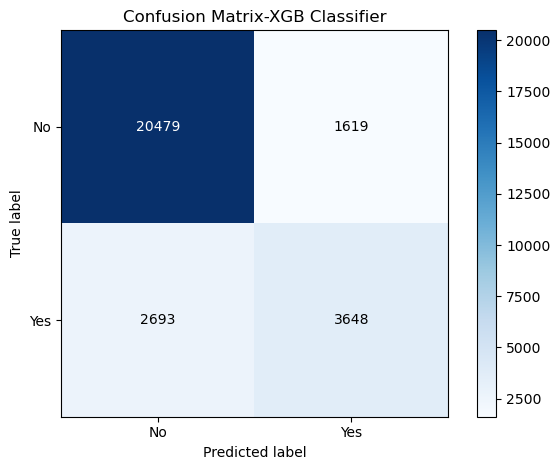

In [38]:
method_name_xgb = 'XGB Classifier'
results_xgb = []
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
# print("XGB Classifier Accuracy: ", mlp_accuracy)
# print("XGB Classifier ROC AUC: ", mlp_roc)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(cm_xgb, labels, method_name_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
precision_xgb = report_xgb['weighted avg']['precision']
recall_xgb = report_xgb['weighted avg']['recall']
f1_score_xgb = report_xgb['weighted avg']['f1-score']

In [39]:
report_xgb

{'0': {'precision': 0.8837821508717417,
  'recall': 0.9267354511720518,
  'f1-score': 0.9047492820852663,
  'support': 22098},
 '1': {'precision': 0.6926143914942092,
  'recall': 0.575303579876991,
  'f1-score': 0.6285320468642316,
  'support': 6341},
 'accuracy': 0.8483772284538837,
 'macro avg': {'precision': 0.7881982711829755,
  'recall': 0.7510195155245214,
  'f1-score': 0.766640664474749,
  'support': 28439},
 'weighted avg': {'precision': 0.8411577701898284,
  'recall': 0.8483772284538837,
  'f1-score': 0.8431615508522208,
  'support': 28439}}

In [40]:
y_pred_xgb

array([1, 0, 0, ..., 0, 0, 0])

In [41]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-0.795121,-1.437856,0.766088,-1.792155e-17,-9.879179e-18,0.079434,1.131626,0.387379,1.645684,2.266466,-2.363065,-1.474898,1.567065e+00,1.662679e+00,-1.295593,-1.481647
1,0.160396,-0.692402,-0.278741,-1.792155e-17,-9.879179e-18,0.612747,1.131626,0.157731,0.220403,1.048809,1.473802,1.277997,-2.842239e-17,-1.496693e-17,-0.430131,-0.681306
2,-0.466173,-0.073535,-0.278741,-1.472589e-01,1.273515e+00,0.917497,1.357820,0.157731,-1.257666,-1.289093,1.844156,1.592186,-1.947704e+00,-2.138249e+00,-0.291038,0.119035
3,0.489344,0.404681,-0.278741,1.542068e+00,-9.879179e-18,0.307996,1.131626,0.042907,-1.099301,-0.558498,-0.659437,-0.816597,1.127719e+00,1.187563e+00,0.079874,0.380964
4,-0.043239,1.206395,-0.278741,-1.472589e-01,-1.290058e+00,2.441248,-0.904114,0.042907,1.065014,-1.289093,-1.622357,-2.133199,1.127719e+00,7.124469e-01,-0.121037,0.832066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,-1.484346,-1.902006,-0.278741,-1.792155e-17,-9.879179e-18,-1.063380,-0.791017,-2.138751,0.378768,2.120348,0.036829,0.051163,1.567065e+00,1.662679e+00,-1.573778,-1.976404
28435,-1.124070,-0.045405,0.124943,9.160308e-03,1.163648e+00,0.079434,-0.112437,0.846676,0.378768,-0.948149,0.333112,0.470082,-1.508358e+00,-1.188017e+00,-0.940135,-0.099240
28436,-0.152889,0.404681,-0.278741,6.035531e-01,1.017158e+00,-0.682442,-0.112437,0.617028,-0.465843,-0.655911,1.577502,1.397688,-1.508358e+00,2.373309e-01,0.172602,0.060828
28437,-0.607151,-0.340773,-0.278741,-1.792155e-17,-9.879179e-18,0.460371,1.131626,0.617028,-0.676996,-0.753324,-0.377968,-0.218142,-1.069012e+00,-1.496693e-17,-0.491949,-0.230205
